# Entrega laboratorio 5

## Integrantes 

- Javier Steven Barrera Toro - 202214779
- Julian Santiago Rolon Toloza - 202215839

In [1]:
from matplotlib import pyplot as plt
from typing import List, Tuple, NewType
import numpy as np
import pandas as pd
import sympy as sp
import copy
import tabulate

np.seterr(divide='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# Problema 1

## 1.1 Formulación del modelo multiobjetivo

### 1.1.1 Conjuntos

Definimos 4 conjuntos: 

- $R$: Conjunto de recursos {Alimentos, Medicinas, Equipos, Agua, Mantas}
- $A$: Conjunto de aviones {1,2,3,4}
- $Z$: COnjunto de ZOnas de destino {A,B,C,D}
- $V$: Conjunto de viajes posibles por avión {1,2}

### 1.1.2 Parámetros

#### Parametros para los recursos: 
- $v_i$: Valor de impacto por tonelada del recurso $i$
- $p_i$: Peso (TON) por unidad del recurso $i$
- $u_i$: Volumen $(m^3)$ por unidad del recurso $i$
- $d_i$: Disponibilidad total (unidades) del recurso $i$

#### Aviones: 
- $capW_j$: Capacidad del peso (TON) del avión $j$
- $capV_j$: Capacidad del volumen $(m^3)$ del avion $j$
- $CF_j$: COsto fijo por uso del avión $j$ (miles USD)
- $CV_j$: Costo variable por jm del avión $j$ (miles USD/km)

#### Zonas:
- $dist_k$: Distancia a la zona $k$ (km)
- $mult_k$: multiplicador de impacto de la zona $k$
- $min_{ik}$: Necesidad mínima del reecurso $i$ en la zona $k$ (TON)

### 1.1.3 Variables de decisión

- $x_{ijvk}$: Cantidad (TON) del recurso $i$ transportado por el avion $j$en viaje $v$ a la zona $k$
- $y_jvk /in {(0,1)}: 1$ si el avion $j$ en el viaje $v$ va a la zona $k$, 0 en caso contrario
- 

### 1.1.4 Funciones objetivo

### 1.1.5 Restricciones

## 1.2 Implementación del Método

## 1.3 Análisis y Descución

# Problema 2

## Formulación del modelo multiobjetivo

### Conjuntos

Se define el conjunto de localidades $N$ que se tienen que inspeccionar y evaluar. Además, el conjunto $E$ con todas las rutas posibles entre las localidades que se deben inspeccionar.

### Parámetros

La matriz $d_{ij}$ tiene la distancia del lugar $i\in N$ al lugar $j \in N \,|\, i \neq j$, ya que no existen autociclos. Cada ruta tiene un riesgo asociado $r_{ij}$ y cada $i \in N$ localidad tiene una calidad de inspección $n_i$. También se define un nodo $o \in N$ que será el punto de partida para que el equipo haga la inspección. 

### Variables de decisión

La variable de decisión es $X_{ij}$ que indica si el camino desde la localidad $i$ a $j$ se selecciona. El dominio de la variable de decisión es binaria ($X_{ij} \in \{0, 1\}$), 1 si se selecciona y 0 de lo contrario. Además, es necesario incluir una variable auxiliar $u_i$ para cada $i \in N \backslash \{o\}$ para darle un orden a las localidades recorridas, por ejemplo, si se toma el camino $(i,j) \in E$ el valor de $u_j > u_i$. Asimismo, los valores que puede tomar $u_i$ son, ya que se sabe que el nodo origen es 0, de $1$ hasta $|N|$. 

### Funciones objetivo

Bien se sabe que se quieren optimizar tres aspectos de este problema. Se tiene que minimizar distancia recorrida. 
$$
Z_1 = \min \sum_{(i,j) \in E} X_{ij} \times d_{ij}
$$
Además, se debe máximizar la calidad de inspección de la ruta. 
$$
Z_2 = \max \sum_{(i,j) \in E} X_{ij} \times n_i \times d_{ij}
$$
También se debe minimizar el riesgo de las rutas elegidas. 
$$
Z_3 = \min \sum_{(i,j) \in E} X_{ij} \times r_{ij}
$$

Recordemos que para poder realizar la optimización todas las funciones deben o maximizar o minimizar. Por esto, es necesario cambiar el objetivo de $Z_2$, en este caso $Z_2^*=\min-Z_2$.
$$
Z_2^* = \min \left(-\sum_{(i,j) \in E} X_{ij} \times n_i \times d_{ij} \right)
$$

Finalmente, la función multiobjetivo es 
$$
\min F = (Z_1, Z_2^*, Z_3)^T
$$

### Restricciones

Se sabe que el equipo debe salir del nodo origen.
$$
\sum_{j \in N} X_{ij} = 1, \forall i \in N \, | \, i = o
$$
El equipo de inspección debe volver al nodo de origen. 
$$
\sum_{i \in N} X_{ij} = 1, \forall j \in N \, | \, j = o
$$
El equipo debe entrar a cada una de las localidades. 
$$
\sum_{i \in N \, | \, i \neq j} X_{ij} = 1, \forall j \in N \backslash \{o\}
$$
El equipo debe salir de cada una de las localidades. 
$$
\sum_{j \in N \, | \, j \neq i} X_{ij} = 1, \forall i \in N \backslash \{o\}
$$
Adicionalmente, se debe agregar la restricción MTZ para la eliminación de subtoures.
$$
u_i - u_j + (|N| - 1) X_{ij} \leq |N| - 2, \forall i, j \in N \, | \, 1 \leq i \wedge j \leq |N| \wedge i \neq j
$$

## Selección y justificación del método de resolución

En un primer momento se habia considerado utilizar $\epsilon$-constraint dado que no se conoce si el frente de pareto óptimo tiene secciones no convexas, sin embargo, dado que se desean minimizar todos los objetivos sin darle más importancia a uno que a otro se opta por usar **suma ponderada**. Además, parece ser una buena opción hallar una solución equilibrada entre los distintos objetivos dado el contexto del problema ya que no se le estaría dando más prioridad a un objetivo y restringiendo los demás. Además, dada la naturaleza de **depende** del contexto del problema se le puede dar más o menos peso a un objetivo dependiendo de si, por ejemplo, si el modelo es en una zona en la que hay bastantes robos. 

## Implementación y análisis

In [10]:
import pandas as pd
from pyomo.environ import *
import matplotlib.pyplot as plt

csv_file_path = './matrix_cost/cost_matrix_10_nodes_1.5_spread.csv'

distance_matrix = pd.read_csv(csv_file_path, header=None).values[1:, :]
num_locations = distance_matrix.shape[0]

distance_matrix

array([[0, 3, 1, 3, 2, 2, 5, 3, 1, 2],
       [3, 0, 4, 2, 3, 3, 5, 1, 2, 3],
       [1, 4, 0, 3, 2, 2, 5, 3, 2, 2],
       [3, 2, 3, 0, 1, 2, 3, 3, 2, 2],
       [2, 3, 2, 1, 0, 1, 3, 3, 2, 1],
       [2, 3, 2, 2, 1, 0, 3, 4, 2, 0],
       [5, 5, 5, 3, 3, 3, 0, 6, 5, 4],
       [3, 1, 3, 3, 3, 4, 6, 0, 1, 4],
       [1, 2, 2, 2, 2, 2, 5, 1, 0, 2],
       [2, 3, 2, 2, 1, 0, 4, 4, 2, 0]])

In [19]:
locations = list(range(num_locations))
depot = 0
inspection_locations = [i for i in locations if i != depot]

all_edges = [(i, j) for i in locations for j in locations if i != j]

distance_data = {(i,j): float(distance_matrix[i][j]) for j in locations for i in locations if i != j}

risk_data = {edge: 5.0 for edge in all_edges}
specific_risks = {
    (0, 1): 3, (0, 2): 2, (0, 3): 4, (0, 4): 5, (0, 5): 6, (0, 6): 3,
    (0, 7): 2, (0, 8): 4, (0, 9): 5, (2, 8): 9, (2, 9): 8, (3, 4): 5,
    (4, 9): 7, (5, 6): 7, (8, 9): 7
}
risk_data.update({k: float(v) for k, v in specific_risks.items()})

quality_data = {
    1: 85.0, 2: 92.0, 3: 78.0, 4: 90.0, 5: 82.0, 6: 88.0, 7: 95.0, 8: 75.0, 9: 84.0
}

#### Pyomo model ####
model = ConcreteModel()

# Sets
model.N = Set(initialize=locations)
model.N_inspect = Set(initialize=inspection_locations)
model.E = Set(initialize=all_edges, dimen=2)

# Parameters
model.d = Param(model.E, initialize=distance_data)
model.r = Param(model.E, initialize=risk_data)
model.n = Param(model.N_inspect, initialize=quality_data)

# Variables
model.X = Var(model.E, domain=Binary) # Usar Binary directamente
model.u = Var(model.N, domain=NonNegativeReals, bounds=(0, num_locations - 1))

# Constraints
# 1. Salir del depósito una vez
model.constraint_leave_depot = Constraint(expr=sum(model.X[depot, j] for j in model.N_inspect if (depot, j) in model.E) == 1)

# 2. Volver al depósito una vez
model.constraint_enter_depot = Constraint(expr=sum(model.X[i, depot] for i in model.N_inspect if (i, depot) in model.E) == 1)

# 3. Entrar a cada localidad de inspección una vez
def rule_enter_location(model, j):
    return sum(model.X[i, j] for i in model.N if i != j and (i, j) in model.E) == 1
model.constraint_enter = Constraint(model.N_inspect, rule=rule_enter_location)

# 4. Salir de cada localidad de inspección una vez
def rule_leave_location(model, i):
    return sum(model.X[i, j] for j in model.N if i != j and (i, j) in model.E) == 1
model.constraint_leave = Constraint(model.N_inspect, rule=rule_leave_location)

# 5. Restricciones MTZ para eliminación de subtours
def rule_mtz(model, i, j):
    if i == j:
        return Constraint.Skip

    if (i, j) in model.E:
        n_total_nodes = len(model.N)
        return model.u[i] - model.u[j] + (n_total_nodes - 1) * model.X[i, j] <= (n_total_nodes - 2)
    else:
        return Constraint.Feasible
model.constraint_mtz = Constraint(model.N_inspect, model.N_inspect, rule=rule_mtz)

Recordemos que se deben normalizar las ecuaciones dado que se encuentran en diferentes escalas y unidades. Notemos que para cada objetivo debemos hallar $f_{min}, f_{max}$ para realizar una normalización de $[0, 1]$. Para realizar esto podemos minimizar y máximizar cada uno de los objetivos para hallar los minimos y los maximos en la región de factibilidad. 

In [20]:
# Z1: Minimizar Distancia Total
def z1_rule(model):
    return sum(model.X[i, j] * model.d[i, j] for i, j in model.E)
model.Z1_expr = Expression(rule=z1_rule)

# Z2: Maximizar Calidad ponderada por Distancia 
def z2_rule(model):
    return sum(model.X[i, j] * (model.n[i] if i in model.N_inspect else 0.0) * model.d[i, j] for i, j in model.E)
model.Z2_expr = Expression(rule=z2_rule)

# Z3: Minimizar Riesgo Total
def z3_rule(model):
    return sum(model.X[i, j] * model.r[i, j] for i, j in model.E)
model.Z3_expr = Expression(rule=z3_rule)

solver = SolverFactory("glpk")
optimization_results = {}

def solve_and_store(model, objective_expr, sense, result_key):
    objective_name = 'active_objective'

    if hasattr(model, objective_name):
        model.del_component(objective_name)

    model.add_component(objective_name, Objective(expr=objective_expr, sense=sense))
    current_objective = getattr(model, objective_name)
    results = solver.solve(model)

    if results.solver.termination_condition == TerminationCondition.optimal:
        obj_value = value(model.active_objective)
        optimization_results[result_key] = obj_value

In [21]:
for i, expr in enumerate([model.Z1_expr, model.Z2_expr, model.Z3_expr]):
    for sense in ['min', 'max']:
        solve_and_store(model, expr, minimize if sense == 'min' else maximize, f'f{i+1}_{sense}') 

# Desactivar el último objetivo activo
if hasattr(model, 'active_objective'):
    model.active_objective.deactivate()

# --- Mostrar Resultados ---
print("### Resumen de Valores Min/Max para Normalización ###")
print(f"Z1 Distancia:\tmin={optimization_results.get('f1_min'):.4f}, \tmax={optimization_results.get('f1_max'):.4f}")
print(f"Z2 Calidad:\tmin={optimization_results.get('f2_min'):.4f}, \tmax={optimization_results.get('f2_max'):.4f}")
print(f"Z3 Riesgo:\tmin={optimization_results.get('f3_min'):.4f}, \tmax={optimization_results.get('f3_max'):.4f}")

### Resumen de Valores Min/Max para Normalización ###
Z1 Distancia:	min=15.0000, 	max=34.0000
Z2 Calidad:	min=1016.0000, 	max=2774.0000
Z3 Riesgo:	min=47.0000, 	max=59.0000


Es necesario hacer combinaciones y asignar pesos a los diferentes objetivos con el fin de conseguir varios puntos para luego hallar el frente de pareto. 

In [22]:
num_steps = 10
list_of_weights = []
tolerance = 1e-9

for i in np.linspace(0, 1, num_steps + 1):
    for j in np.linspace(0, 1 - i + tolerance, num_steps + 1):
        if i + j <= 1.0 + tolerance:
            k = 1.0 - i - j
            if k >= 0 - tolerance:
                w1 = round(i, 4)
                w2 = round(j, 4)
                w3 = round(k, 4)

                if abs(w1 + w2 + w3 - 1.0) < tolerance:
                    list_of_weights.append({'Z1': w1, 'Z2': w2, 'Z3': w3})

unique_weights_tuples = {tuple(sorted(d.items())) for d in list_of_weights}
unique_weights = [dict(t) for t in unique_weights_tuples]

print(f"Generadas {len(unique_weights)} combinaciones de pesos únicas.")

f1_min = optimization_results.get('f1_min')
f1_max = optimization_results.get('f1_max')
f2_min = optimization_results.get('f2_min')
f2_max = optimization_results.get('f2_max')
f3_min = optimization_results.get('f3_min')
f3_max = optimization_results.get('f3_max')

required_values = [f1_min, f1_max, f2_min, f2_max, f3_min, f3_max]

den1 = f1_max - f1_min if (f1_max - f1_min) != 0 else 1.0
den2 = f2_max - f2_min if (f2_max - f2_min) != 0 else 1.0
den3 = f3_max - f3_min if (f3_max - f3_min) != 0 else 1.0

param_names = ['w1', 'w2', 'w3']
initial_weight_values = [0.0, 0.0, 0.0]

for name, initial_val in zip(param_names, initial_weight_values):
    if not hasattr(model, name):
        setattr(model, name, Param(initialize=initial_val, mutable=True))
    else:
        param_component = getattr(model, name)
        if not isinstance(param_component, Param) or not param_component.is_indexed():
             param_component.set_value(initial_val)
             param_component.mutable = True

Generadas 108 combinaciones de pesos únicas.


In [24]:
def weighted_sum_rule_mutable(model):
    # Normalizar Z1 (minimizar)
    norm_Z1 = (model.Z1_expr - f1_min) / den1 if den1 != 1.0 else 0.0
    # Normalizar Z2 (maximizar)
    norm_Z2 = (f2_max - model.Z2_expr) / den2 if den2 != 1.0 else 0.0
    # Normalizar Z3 (minimizar)
    norm_Z3 = (model.Z3_expr - f3_min) / den3 if den3 != 1.0 else 0.0

    # Usar los parámetros mutables del modelo
    return model.w1 * norm_Z1 + model.w2 * norm_Z2 + model.w3 * norm_Z3

objective_name = 'ws_objective_mutable'

if hasattr(model, 'active_objective'): model.del_component(model.active_objective)
if hasattr(model, 'weighted_sum_objective'): model.del_component(model.weighted_sum_objective)
if hasattr(model, objective_name): model.del_component(objective_name)

model.add_component(objective_name, Objective(rule=weighted_sum_rule_mutable, sense=minimize))

pareto_points = []

for idx, current_weights in enumerate(unique_weights):
    model.w1.set_value(current_weights['Z1'])
    model.w2.set_value(current_weights['Z2'])
    model.w3.set_value(current_weights['Z3'])

    solver_results = solver.solve(model, tee=False)

    if solver_results.solver.termination_condition == TerminationCondition.optimal:
        z1_val = value(model.Z1_expr)
        z2_val = value(model.Z2_expr)
        z3_val = value(model.Z3_expr)
        pareto_points.append({
            'w1': current_weights['Z1'],
            'w2': current_weights['Z2'],
            'w3': current_weights['Z3'],
            'Z1_Distance': z1_val,
            'Z2_Quality': z2_val,
            'Z3_Risk': z3_val
        })
        
pareto_df = pd.DataFrame(pareto_points)
pareto_df_unique_objectives = pareto_df.drop_duplicates(subset=['Z1_Distance', 'Z2_Quality', 'Z3_Risk'])

print("DataFrame con Puntos del Frente de Pareto:")
print(pareto_df_unique_objectives[['Z1_Distance', 'Z2_Quality', 'Z3_Risk']].round(2))

DataFrame con Puntos del Frente de Pareto:
    Z1_Distance  Z2_Quality  Z3_Risk
0          32.0      2689.0     47.0
2          15.0      1213.0     47.0
3          34.0      2774.0     52.0
12         34.0      2770.0     50.0
24         15.0      1195.0     51.0
39         32.0      2689.0     49.0
45         31.0      2619.0     47.0
62         20.0      1698.0     47.0
72         28.0      2384.0     47.0
77         21.0      1788.0     47.0
98         21.0      1708.0     47.0


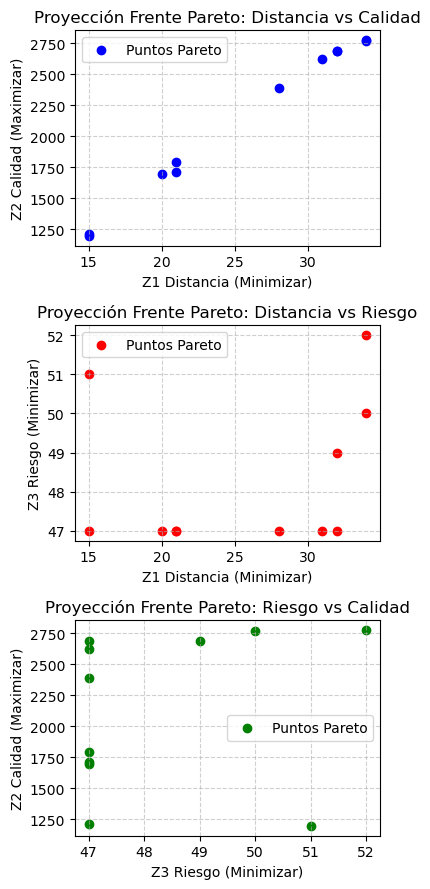

In [26]:
fig, ax = plt.subplots(3, 1, figsize=(4, 9), tight_layout=True)

x1_data = pareto_df_unique_objectives['Z1_Distance']
y1_data = pareto_df_unique_objectives['Z2_Quality']

ax[0].scatter(x1_data, y1_data, c='blue', label='Puntos Pareto')
ax[0].set_title('Proyección Frente Pareto: Distancia vs Calidad')
ax[0].set_xlabel('Z1 Distancia (Minimizar)')
ax[0].set_ylabel('Z2 Calidad (Maximizar)')
ax[0].grid(True, linestyle='--', alpha=0.6)
ax[0].legend()

x2_data = pareto_df_unique_objectives['Z1_Distance']
y2_data = pareto_df_unique_objectives['Z3_Risk']

ax[1].scatter(x2_data, y2_data, c='red', label='Puntos Pareto')
ax[1].set_title('Proyección Frente Pareto: Distancia vs Riesgo')
ax[1].set_xlabel('Z1 Distancia (Minimizar)')
ax[1].set_ylabel('Z3 Riesgo (Minimizar)')
ax[1].grid(True, linestyle='--', alpha=0.6)
ax[1].legend()

ax[2].scatter(y2_data, y1_data, c='green', label='Puntos Pareto')
ax[2].set_title('Proyección Frente Pareto: Riesgo vs Calidad')
ax[2].set_xlabel('Z3 Riesgo (Minimizar)')
ax[2].set_ylabel('Z2 Calidad (Maximizar)')
ax[2].grid(True, linestyle='--', alpha=0.6)
ax[2].legend()

plt.show()

En la gráfica 1 se puede ver que a medida que se disminuye la distancia (mejora) se disminuye la calidad de la inspección (empeora). Esto indica que no se puede obtener una ruta más corta y de mejor calidad sinultáneamente. Los puntos intermedios de $20 < Z1 < 25$ parecen ofrecer un balance, mejoran la calidad respecto al mínimo pero sin alargar excesivamente la distancia. 

Mientras que en la gráfica 2, se puede ver como a medida que la distancia disminuye (mejora) el riesgo en la ruta también **tiende** a disminuir (mejora). Los puntos con mayor distancia tienden a tener mayor riesgo. En este caso parece haber menos conflicto  entre minimizar la distancia y minimizar el riesgo, al menos para las soluciones que se encontraron. Dada la ubicación de algunos puntos no hay un conflicto fuerte inverso, sí existe una compensación: no se puede garantizar el mínimo absoluto de ambos simultáneamente, pero minimizar uno parece ayudar a mantener bajo el otro. 

Por otro lado, la gráfica 3 se observa una tendencia conflictiva, a medida que la calidad aumenta (mejora) el riesgo también lo hace (empeora). Para obtener una alta calidad, se debe aceptar mayor riesgo. Lo cual indica que hay una compensación clara entre minimizar riesgo y maximizar calidad. 

Finalmente, se puede concluir que existe un conflicto fuerte entre distancia y riesgo contra calidad. Mejorar la calidad implica empeorar la distancia y el riesgo. La relación entre distancia y riesgo parece ser menor conflictiva, las rutas más cortas tienden a ser también las de menor riesgo dentro del conjunto de soluciones óptimas encontradas. 

## Análisis y discusión adicional

1. Evalúe cómo afectaría al diseño de la red logística el cambio de importancia relativa entre los objetivos (por ejemplo, si el costo total fuera significativamente más importante que la cobertura o el tiempo de entrega).

    **Respuesta.** Modificar la importancia (peso) entre los objetivos (distancia, calidad, riesgo) impacta directamente el diseño de la ruta logística seleccionada del frente de Pareto, reflejando las compensaciones analizadas. Si se prioriza minimizar la distancia, la ruta resultante será corta, de bajo riesgo pero también de baja calidad. Si se da máxima importancia a la calidad, la ruta será más larga y de mayor riesgo. Finalmente, si se prioriza minimizar el riesgo, se obtendrá una ruta de bajo riesgo y relativamente corta, pero sacrificando la calidad de la inspección. Por lo tanto, la asignación de pesos determina las características de la ruta óptima elegida como el mejor compromiso.

2. Identifique claramente la solución de compromiso que considera más equilibrada, justificando su elección con base en criterios específicos.

    **Respuesta.** Se puede buscar un codo en las gráficas para elegir la solución de compromiso más equilibrada. Este punto ocurre aproximadamente en $Z1 \approx 20-22$, $Z2\approx 1750 - 1800$ y $Z3 \approx 47$ ya que mejora la calidad sin aumentar el riesgo y con un aumento de distancia que parece razonable en comparación con los beneficios obtenidos en los demás objetivos. 